In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

## Cases based on the inference result

### These are the possible outcomes in the inference:

#### correct_base_clean: The base non-symbolic way infers correctly - clean accuracy
#### correct_sym_clean: The symbolic way infers correctly - clean symbolic accuracy
#### correct_base_perturbed: The base non-symbolic accuracy after attack - robust non-symbolic accuracy
#### correct_sym_robust: The base non-symbolic accuracy after attack - robust symbolic accuracy


### We are considering the following scenarios or cases based on the combination of above outcomes: 


### <span style="color:blue">  Case 1 :   A general idea of "What went right"  </span>
#### <span style="color:blue"> correct_base_clean:1, correct_sym_clean:1, correct_base_perturbed:1, correct_sym_robust:1 </span>

### <span style="color:red"> Case 2 :  Very bad! the attack not successful on non-symbolic but on the symbolic one. </span>
#### <span style="color:red"> correct_base_clean:1, correct_sym_clean:1, correct_base_perturbed:1, correct_sym_robust:0 </span> 

### <span style="color:blue"> Case 3:  Ah! this is what we want, symbolic inference resists the attack  </span>
#### <span style="color:blue"> correct_base_clean:1, correct_sym_clean:1, correct_base_perturbed:0, correct_sym_robust:1 </span>

### <span style="color:red"> Case 4 :  Attack is strong enough to break symbolic defense  </span>
#### <span style="color:red"> correct_base_clean:1, correct_sym_clean:1, correct_base_perturbed:0, correct_sym_robust:0 </span> 


### <span style="color:red"> Case 5 : clean symbolic inference failed  </span>
### <span style="color:red"> Case 6 : clean base non-symbolic inference failed </span>  

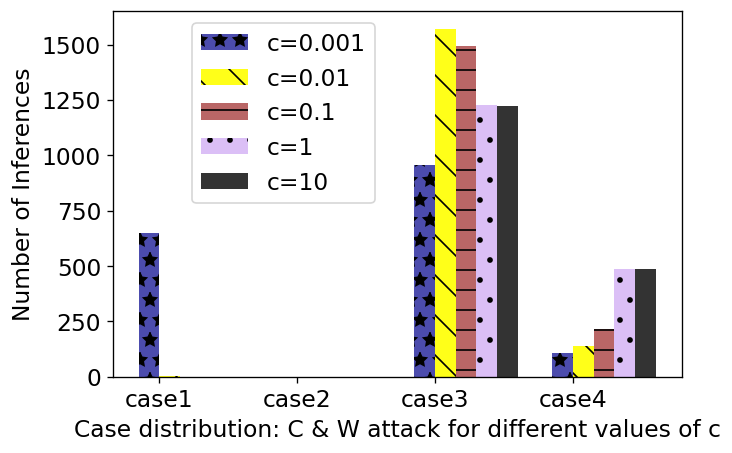

In [3]:
# Small hack in Jupyter
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower
plt.rcParams.update({'font.size': 14})
N = 4
ind = np.arange(N)
cw_c_point001 = (649, 0, 954, 109) #,  122,  166)
cw_c_point01 =  (1, 0, 1571, 140)  #,  122,  166)
cw_c_point1 =   (0, 0, 1495, 217) #,  122,  166)
cw_c_1 =        (0, 0, 1225, 487) #,  122,  166)
cw_c_10 =        (0, 0, 1224, 488) #,  122,  166)


# cw_c_1 =    (649, 0, 954, 109,  122,  166)
# cw_c_10 =   (649, 0, 954, 109,  122,  166)
# cw_c_100 =  (649, 0, 954, 109,  122,  166)

width = 0.15       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, cw_c_point001, width, hatch=patterns[9], alpha=0.7, color='darkblue', log=False)
rects2 = ax.bar(ind+width, cw_c_point01, width, hatch=patterns[1], color='yellow',  alpha=0.9, log=False)
rects3 = ax.bar(ind+2*width, cw_c_point1, width, hatch=patterns[3], color='darkred',  alpha=0.6, log=False)
rects4 = ax.bar(ind+3*width, cw_c_1, width, hatch=patterns[8], color='blueviolet',  alpha=0.3, log=False)
rects5 = ax.bar(ind+4*width, cw_c_10, width,  color='black',  alpha=0.8, log=False)



labels = ('case1', 'case2', 'case3', 'case4')#, 'case5', 'case6')

# add some
ax.set_ylabel('Number of Inferences', fontsize=14)
ax.set_xlabel('Case distribution: C & W attack for different values of c', fontsize=14)
#ax.set_title('Comparison of case distribution in Carlini and Wagner attack for different values of c')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels,  fontsize=14)#rotation='vertical',
ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0]), ('c=0.001', 'c=0.01', 'c=0.1', 'c=1', 'c=10'),loc='upper center', bbox_to_anchor=(0.3, 1))# ,loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
plt.tight_layout()    
#plt.show()
plt.savefig('../cw_case_distributions.png', format='png', dpi=1000)

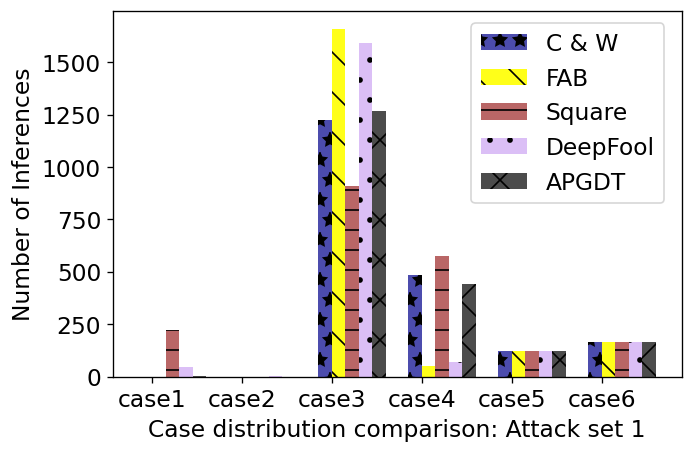

In [48]:
# Small hack in Jupyter
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower
plt.rcParams.update({'font.size': 14})
N = 6
ind = np.arange(N)
cw =           (0, 0, 1225, 487,  122,  166)
fab =          (0, 0, 1660, 52,   122,  166)
sq  =          (224, 0, 912, 576, 122,  166)
df  =          (46, 3, 1594, 69, 122,  166)
apgdt =        (5, 0, 1267, 440, 122,  166)

width = 0.15       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, cw, width, hatch=patterns[9], alpha=0.7, color='darkblue', log=False)
rects2 = ax.bar(ind+width, fab, width, hatch=patterns[1], color='yellow',  alpha=0.9, log=False)
rects3 = ax.bar(ind+2*width, sq, width, hatch=patterns[3], color='darkred',  alpha=0.6, log=False)
rects4 = ax.bar(ind+3*width, df, width, hatch=patterns[8], color='blueviolet',  alpha=0.3, log=False)
rects5 = ax.bar(ind+4*width, apgdt, width, hatch=patterns[5], color='black',  alpha=0.7, log=False)


labels = ('case1', 'case2', 'case3', 'case4', 'case5', 'case6')

# add some
ax.set_ylabel('Number of Inferences', fontsize=14)
ax.set_xlabel('Case distribution comparison: Attack set 1', fontsize=14)
#ax.set_title('Comparison of case distribution in Carlini and Wagner attack for different values of c')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels,  fontsize=14)#rotation='vertical',
ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0]), ('C & W', 'FAB', 'Square', 'DeepFool', 'APGDT'),loc='upper center', bbox_to_anchor=(0.8, 1))# ,loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
plt.tight_layout()    
#plt.show()
plt.savefig('../set1_case_distributions.png', format='png', dpi=1000)

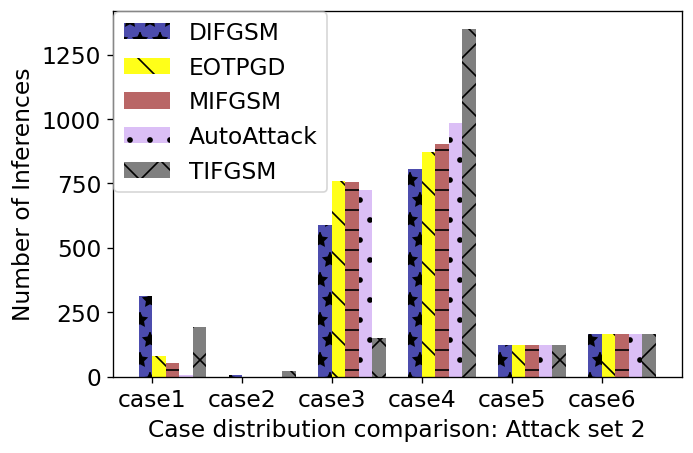

In [47]:
# Small hack in Jupyter
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower
plt.rcParams.update({'font.size': 14})
N = 6
ind = np.arange(N)
difgsm =           (312, 6, 587, 807,  122,  166)
eotpgd =          (81, 0, 758, 873,   122,  166)
mifgsm  =          (54, 0, 757, 901, 122,  166)
autoattack  =          (5, 0, 723, 984, 122,  166)
tifgsm  =          (191, 22, 149, 1350, 122,  166)

width = 0.15       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, difgsm, width, hatch=patterns[9], alpha=0.7, color='darkblue', log=False)
rects2 = ax.bar(ind+width, eotpgd, width, hatch=patterns[1], color='yellow',  alpha=0.9, log=False)
rects3 = ax.bar(ind+2*width, mifgsm, width, hatch=patterns[3], color='darkred',  alpha=0.6, log=False)
rects4 = ax.bar(ind+3*width, autoattack, width, hatch=patterns[8], color='blueviolet',  alpha=0.3, log=False)
rects5 = ax.bar(ind+4*width, tifgsm, width, hatch=patterns[5], color='black',  alpha=0.5, log=False)


labels = ('case1', 'case2', 'case3', 'case4', 'case5', 'case6')

# add some
ax.set_ylabel('Number of Inferences', fontsize=14)
ax.set_xlabel('Case distribution comparison: Attack set 2', fontsize=14)
#ax.set_title('Comparison of case distribution in Carlini and Wagner attack for different values of c')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels,  fontsize=14)#rotation='vertical',
ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0], rects5[0]), ('DIFGSM', 'EOTPGD', 'MIFGSM', 'AutoAttack', 'TIFGSM'),loc='upper center', bbox_to_anchor=(0.19, 1.03))# ,loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
plt.tight_layout()    
#plt.show()
plt.savefig('../set2_case_distributions.png', format='png', dpi=1000)

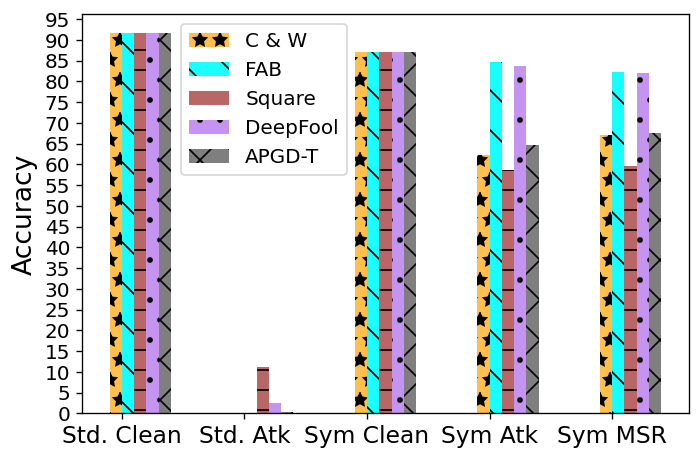

In [49]:
#Accuracy set 1


# Small hack in Jupyter
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower
plt.rcParams.update({'font.size': 12})
N = 5
ind = np.arange(N)
cw =          (91.7,  0, 87.15,   62.2, 67.2)
fab =         (91.7,  0, 87.15,   84.7, 82.25)
sq  =         (91.7,  11.2, 87.15,   58.7, 59.5)
df  =         (91.7,  2.55, 87.15,   83.65, 82.15)
apgdt =       (91.7,  0.25, 87.15,   64.75, 67.55)


width = 0.1       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, cw, width, hatch=patterns[9], alpha=0.7, color='orange', log=False)
rects2 = ax.bar(ind+width, fab, width,  hatch=patterns[1], color='cyan',  alpha=0.9, log=False)
rects3 = ax.bar(ind+2*width, sq, width, hatch=patterns[3], color='darkred',  alpha=0.6, log=False)
rects4 = ax.bar(ind+3*width, df, width, hatch=patterns[8], color='blueviolet',  alpha=0.5, log=False)
rects5 = ax.bar(ind+4*width, apgdt, width, hatch=patterns[5], color='black',  alpha=0.5, log=False)


labels = ('Std. Clean', 'Std. Atk', 'Sym Clean', 'Sym Atk', 'Sym MSR')

# add some
ax.set_ylabel('Accuracy', fontsize=16)
#ax.set_title('Comparison of accuracy on adversarial attacks')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels,  fontsize=14)#rotation='vertical',
plt.yticks(np.arange(0, 100, 5.0))
ax.legend( (rects1[0], rects2[0],rects3[0], rects4[0], rects5[0]), ('C & W', 'FAB', 'Square', 'DeepFool', 'APGD-T') ,loc='upper center',  bbox_to_anchor=(0.3, 1)) # bbox_to_anchor=(0.5, 1.05), ncol=5, fancybox=True, shadow=True)
plt.tight_layout()    
#plt.show()
plt.savefig('../set1_accuracies.png', format='png', dpi=1000)

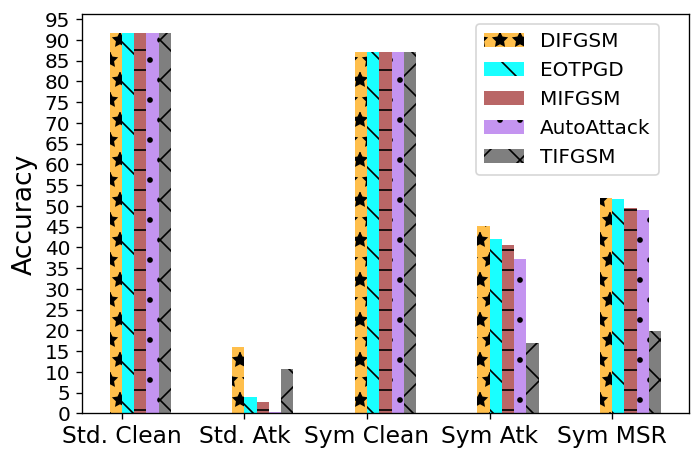

In [50]:
#Accuracy set 2

# Small hack in Jupyter
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower
plt.rcParams.update({'font.size': 12})
N = 5
ind = np.arange(N)
difgsm =          (91.7,  15.9, 87.15,   45.05, 52.0)
eotpgd =         (91.7,  4.05, 87.15,  42.1, 51.7)
mifgsm  =         (91.7,  2.7, 87.15,   40.65, 49.6)
autoattack  =         (91.7,  0.25, 87.15, 37.3, 48.9)
tifgsm  =         (91.7,  10.65, 87.15, 17.0, 19.9)


width = 0.1       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, difgsm, width, hatch=patterns[9], alpha=0.7, color='orange', log=False)
rects2 = ax.bar(ind+width, eotpgd, width,  hatch=patterns[1], color='cyan',  alpha=0.9, log=False)
rects3 = ax.bar(ind+2*width, mifgsm, width, hatch=patterns[3], color='darkred',  alpha=0.6, log=False)
rects4 = ax.bar(ind+3*width, autoattack, width, hatch=patterns[8], color='blueviolet',  alpha=0.5, log=False)
rects5 = ax.bar(ind+4*width, tifgsm, width, hatch=patterns[5], color='black',  alpha=0.5, log=False)


labels = ('Std. Clean', 'Std. Atk', 'Sym Clean', 'Sym Atk', 'Sym MSR')

# add some
ax.set_ylabel('Accuracy', fontsize=16)
#ax.set_title('Comparison of accuracy on adversarial attacks')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels,  fontsize=14)#rotation='vertical',
plt.yticks(np.arange(0, 100, 5.0))
ax.legend( (rects1[0], rects2[0],rects3[0], rects4[0], rects5[0]), ('DIFGSM', 'EOTPGD', 'MIFGSM', 'AutoAttack', 'TIFGSM') ,loc='upper center',  bbox_to_anchor=(0.8, 1)) # bbox_to_anchor=(0.5, 1.05), ncol=5, fancybox=True, shadow=True)
plt.tight_layout()    
#plt.show()
plt.savefig('../set2_accuracies.png', format='png', dpi=1000)